In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test,y_test)=mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

W0423 22:36:33.489981  2416 deprecation.py:506] From C:\Users\Rudra\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
60000/60000 [==============================] - 16s 271us/sample - loss: 0.3299 - acc: 0.9075
Epoch 2/3
60000/60000 [==============================] - 15s 248us/sample - loss: 0.1225 - acc: 0.9619
Epoch 3/3
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0821 - acc: 0.9742


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 139us/sample - loss: 0.0949 - acc: 0.9719
0.09489961334848776 0.9719


In [4]:
model.save('num_reader.model')
new_model = tf.keras.models.load_model('num_reader.model')

W0423 22:38:40.968574  2416 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [5]:
predictions = new_model.predict(x_test)

In [ ]:
#print(predictions)

In [6]:
import numpy as np
print(np.argmax(predictions[10]))

0


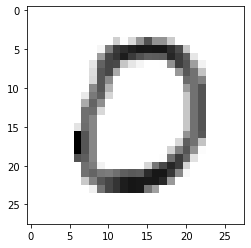

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_test[10], cmap = plt.cm.binary)
plt.show()
#print(x_train[0])